Start by loading the new raw data in HW3_data.csv.
The dataset is almost identical to the one from the previous assignments, but we deleted
the binary targets and revealed the continuous contamination_level target variable.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
filename = 'data_HW3.csv'

In [33]:
dataset = pd.read_csv(filename)

In [34]:
from sklearn.model_selection import train_test_split
sum_of_last_2_digits_IDS=98
train_set , test_set = train_test_split(dataset, test_size=0.2, random_state=sum_of_last_2_digits_IDS)

In [35]:
import prepare
train_set_prepared = prepare.prepare_data(train_set,train_set)
test_set_prepared = prepare.prepare_data(train_set,train_set)

c:\Users\t-darnissan\OneDrive - Microsoft\Technion\Semster 6\236756 - Intro to ML\HW\ML_Intro\Major_HW3\prepare.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data[feature].fillna(median, inplace = True)
c:\Users\t-darnissan\OneDrive - Microsoft\Technion\Semster 6\236756 - Intro to ML\HW\ML_Intro\Major_HW3\prepare.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will

For this section only, split your training set into a (new) training subset (80%)
and a validation subset (20%).
● Copy the given LinearRegressor module into your notebook / project.

In [36]:
SectionA_Dataset = train_set_prepared.copy()
sectionA_train,sectionA_validation = train_test_split(SectionA_Dataset, test_size=0.2, random_state=sum_of_last_2_digits_IDS)

In [37]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegressor(BaseEstimator, RegressorMixin):
    """
    Custom linear regression model
    """
    def __init__(self, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param lr: the SGD learning rate (step size)
        """
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.zeros(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, X, y):
        """
        Compute the MSE objective loss.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the linear regression objective loss (float scalar)
        """

        # TODO: complete the loss calculation
        # Calculate the predicted values
        y_pred = np.dot(X, w) + b

        # Calculate the mean squared error loss
        loss = np.mean((y_pred - y) ** 2)

        return loss

    @staticmethod
    def gradient(w, b: float, X, y):
        # Calculate the predicted values
        y_pred = np.dot(X, w) + b
        # Calculate the error
        error = y_pred - y
        # Calculate the gradient with respect to w
        g_w = (2 / X.shape[0]) * np.dot(X.T, error)
        # Calculate the gradient with respect to b
        g_b = (2 / X.shape[0]) * np.sum(error)
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 1000, keep_losses: bool = True,
                      X_val  =None, y_val = None):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses: should compute the train & val losses during training?
        :param X_val: validation samples to compute the loss for (for logs only)
        :param y_val: validation labels to compute the loss for (for logs only)
        :return: training and validation losses during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        train_losses = []
        val_losses = []

        if keep_losses:
            train_losses.append(self.loss(self.w, self.b, X, y))
            val_losses.append(self.loss(self.w, self.b, X_val, y_val))

        # Iterate over batches (SGD)
        for itr in range(0, max_iter):
            start_idx = (itr * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]

            # Compute the gradient for the current *batch*
            g_w, g_b = self.gradient(self.w, self.b, batch_X, batch_y)

            # Update the learned parameters correctly
            self.w = self.w - self.lr * g_w
            self.b = self.b - self.lr * g_b

            if keep_losses:
                train_losses.append(self.loss(self.w, self.b,  X, y))
                val_losses.append(self.loss(self.w, self.b,  X_val, y_val))

        return train_losses, val_losses

    def fit(self, X, y, max_iter: int = 1000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Regress labels on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted continuous labels for samples in X; array of shape (n_samples,)
        """

        y_pred = np.dot(X, self.w) + self.b
      

        return y_pred

In [38]:
def numerical_subgradient(w, b, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = LinearRegressor.loss(w_, b, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = LinearRegressor.loss(w_, b, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (LinearRegressor.loss(w_, b + delta, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=10, figsize=(10, 6)):
    residual_means_w = []
    residual_means_b = []

    for delta in deltas:
        residuals_w = []
        residuals_b = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad_w, analytic_grad_b = LinearRegressor.gradient(w, b, X, y)

            numeric_grad_w, numeric_grad_b = numerical_subgradient(w, b, X, y, delta=delta)

            residual_w = np.linalg.norm(numeric_grad_w - analytic_grad_w)
            residuals_w.append(residual_w)

            residual_b = np.linalg.norm(numeric_grad_b - analytic_grad_b)
            residuals_b.append(residual_b)

        residual_means_w.append(np.mean(residuals_w))
        residual_means_b.append(np.mean(residuals_b))

    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    plt.suptitle('Residuals of analytical and numerical gradients',
                 fontsize=22, fontweight="bold")
    axs[0].set_title(r'Residuals of $\nabla_{w}L\left(w,b\right)$')
    axs[1].set_title(r'Residuals of $\frac{\partial}{\partial{b}}L\left(w,b\right)$')
    axs[0].plot(deltas, residual_means_w, linewidth=3)
    axs[1].plot(deltas, residual_means_b, linewidth=3)
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')
    axs[0].set_xlabel('$\delta_w$', fontsize=18)
    axs[1].set_xlabel('$\delta_b$', fontsize=18)
    axs[0].set_ylabel(r'$\left\Vert \nabla_{w}L\left(w,b\right) - u_{\delta_w} \left(w,b\right)\right\Vert$',
                      fontsize=18)
    axs[1].set_ylabel(
        r'$\left\Vert \frac{\partial}{\partial{b}}L\left(w,b\right) - u_{\delta_b} \left(w,b\right)\right\Vert$',
        fontsize=18)

    axs[0].grid(alpha=0.5)
    axs[1].grid(alpha=0.5)
    plt.show()


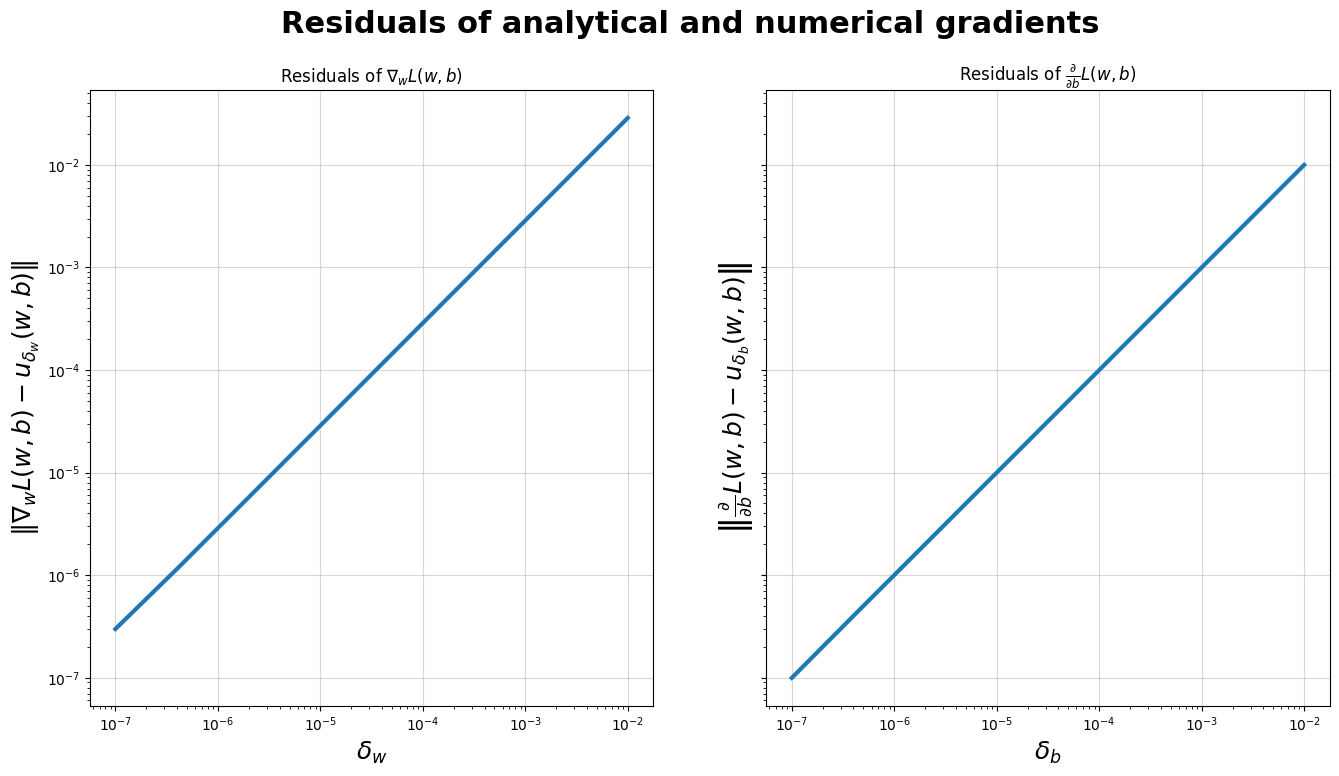

In [39]:
# take here the features PCR_10 to PCR_10 and sugar_levels
q2_X_train = sectionA_train[['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']].values
q2_y_train = sectionA_train['contamination_level'].values
compare_gradients(q2_X_train, q2_y_train, deltas=np.logspace(-7, -2, 9))

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
  lr_list = np.logspace(-9, -1, 9)

  fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  fig.subplots_adjust(hspace=0.5, top=0.9)
  
  axs = np.ravel(axs)
  for i, lr in enumerate(lr_list):
    cur_linear_reggressor = LinearRegressor(lr)
    train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
    print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

    iterations = np.arange(max_iter + 1)
    axs[i].semilogy(iterations, train_losses, label="Train")
    axs[i].semilogy(iterations, val_losses, label="Validation")
    axs[i].grid(alpha=0.5)
    axs[i].legend()
    axs[i].set_title('lr = '+str(lr))
    axs[i].set_xlabel('iteration')
    axs[i].set_ylabel('MSE')

lr size = 1e-09, Best train loss = 0.07553785944734966, Best validation loss = 0.08234882209750452
lr size = 1e-08, Best train loss = 0.07553503503598541, Best validation loss = 0.08234578096459699
lr size = 1e-07, Best train loss = 0.07550679936620269, Best validation loss = 0.08231537863595366
lr size = 1e-06, Best train loss = 0.07522528533817904, Best validation loss = 0.08201225359185062
lr size = 1e-05, Best train loss = 0.07249272204298676, Best validation loss = 0.0790690535660516
lr size = 0.0001, Best train loss = 0.05196690360637887, Best validation loss = 0.05690848262053074
lr size = 0.001, Best train loss = 0.022986844048755853, Best validation loss = 0.026014879081227918
lr size = 0.01, Best train loss = 0.02273743099482558, Best validation loss = 0.02580893267844454
lr size = 0.1, Best train loss = 0.02287432974768959, Best validation loss = 0.025154764386390555


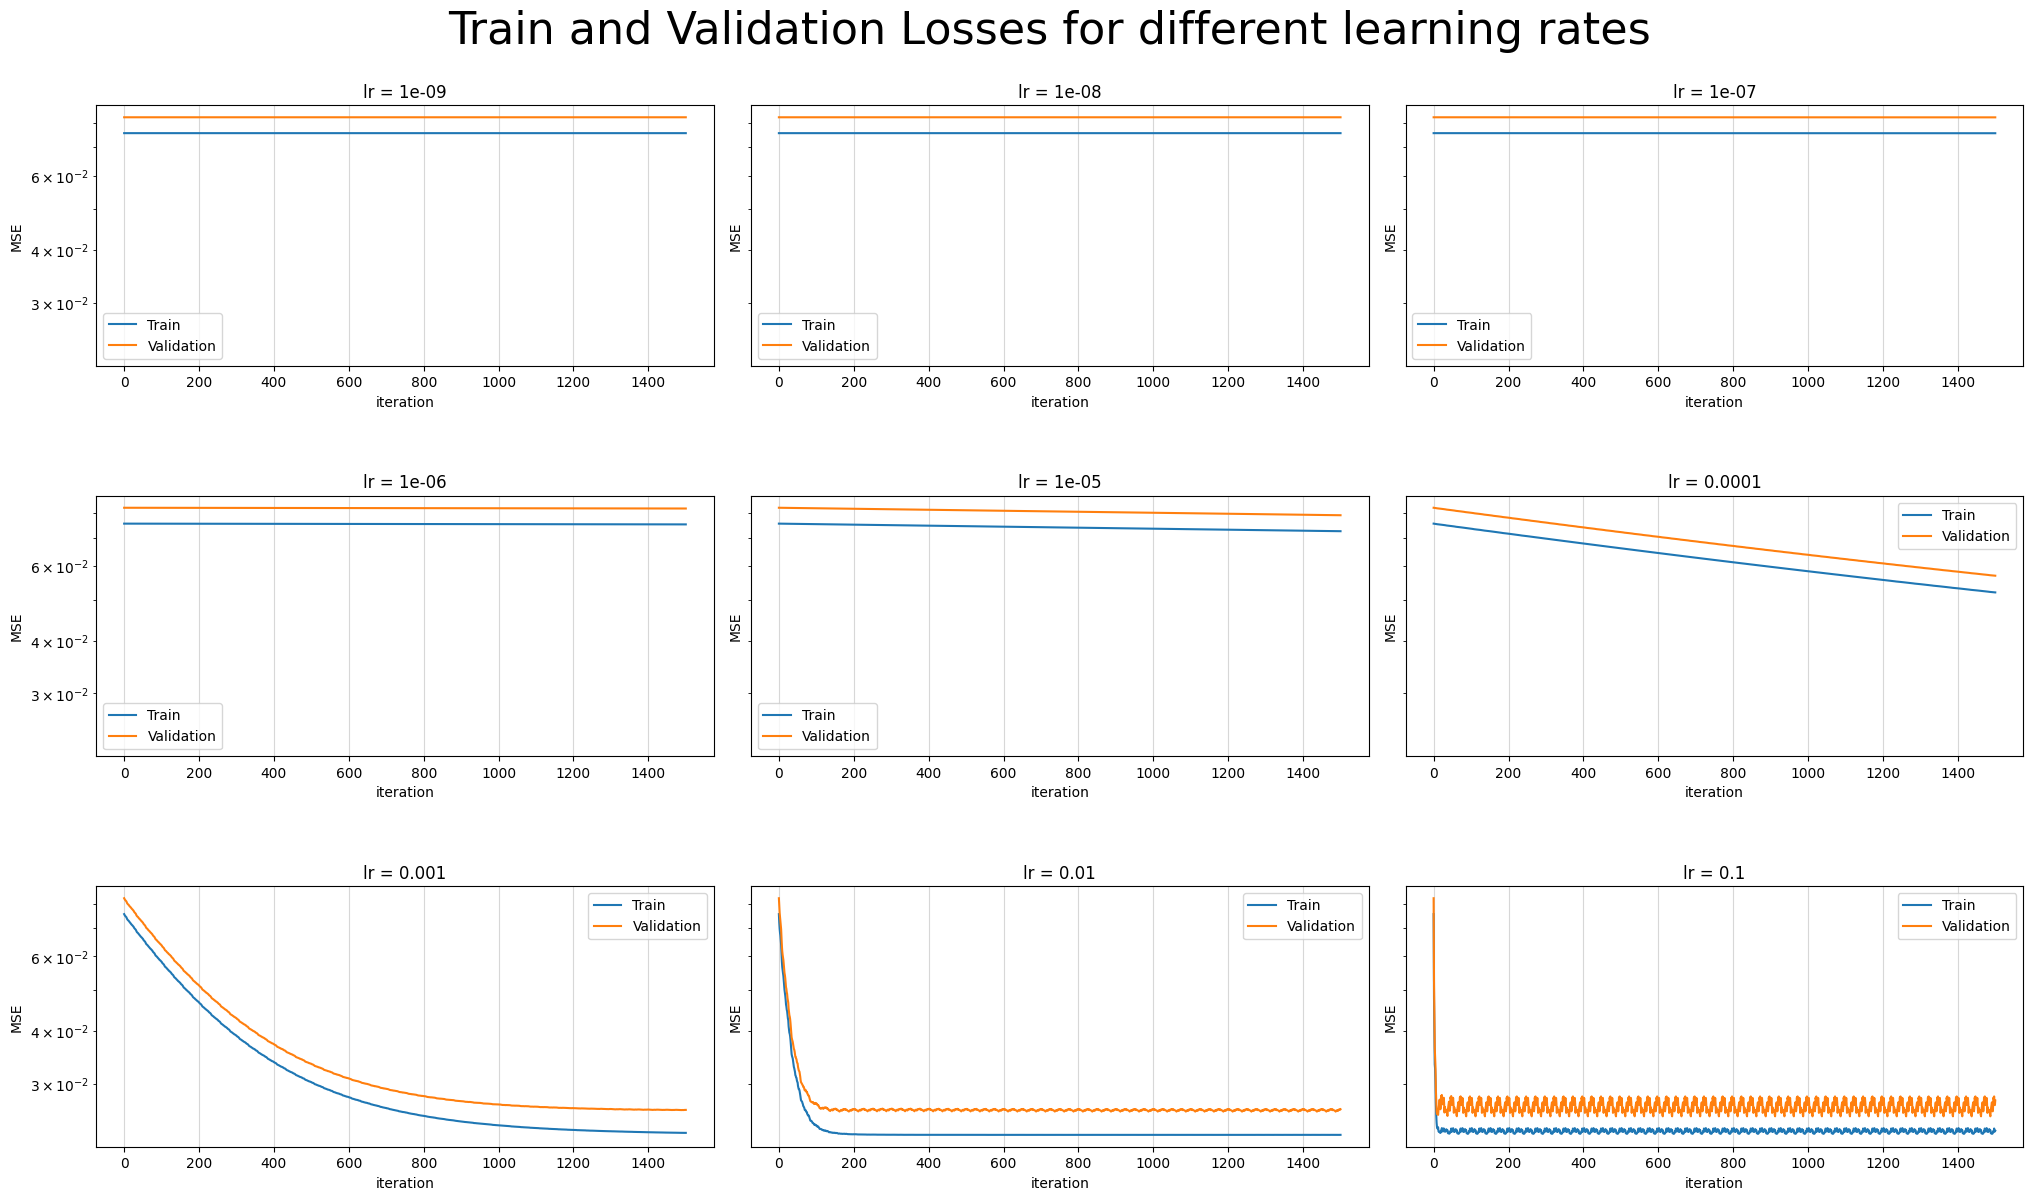

In [41]:
q3_X_val = sectionA_validation[['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']].values
q3_y_val = sectionA_validation['contamination_level'].values
test_lr(q2_X_train, q2_y_train, q3_X_val, q3_y_val,title='Train and Validation Losses for different learning rates')

SECTION 2

In [ ]:
Create a DummyRegressor. Evaluate its performance using cross-validation.
In your report

In [46]:
# Create a DummyRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
SectionB_Dataset = train_set_prepared.copy()
q4_X_train = SectionB_Dataset[['PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']].values
q4_y_train = SectionB_Dataset['contamination_level'].values
dummy_regressor = DummyRegressor(strategy="mean")
dummy_scores = cross_val_score(dummy_regressor, q4_X_train, q4_y_train, cv=5, scoring='neg_mean_squared_error')





IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices